# 主成分分析 

## 1 导入数据 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [2]:
mat = loadmat("./data/ex7data1.mat")
X = mat["X"]
X.shape

(50, 2)

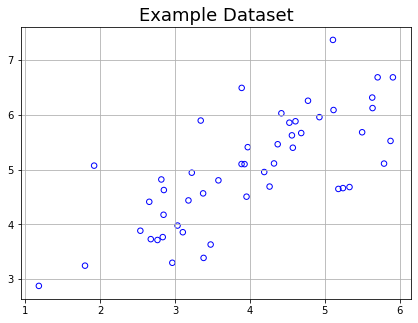

In [3]:
plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset",fontsize=18)
plt.grid(True)

## 2 数据标准化 

In [9]:
def features_normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return mean, std, (X - mean) / std
mean, std, norm_X = features_normalize(X)
mean.shape, std.shape, norm_X.shape

((2,), (2,), (50, 2))

## 3 PAC

In [10]:
from scipy.linalg import svd

In [ ]:
def get_USV(norm_X):
    cov_mat = (norm_X.T @ norm_X) / len(norm_X)
    return svd(cov_mat, full_matrices=True, compute_uv=True)
U, S, V = get_USV(norm_X)
U.shape, S.shape, V.shape

In [13]:
means = mean

Top principal component is  [-0.70710678 -0.70710678]


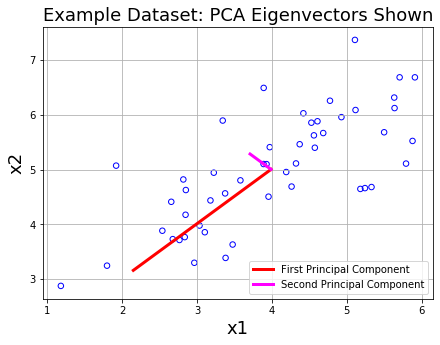

In [14]:
# "...output the top principal component (eigen- vector) found, 
# and you should expect to see an output of about [-0.707 -0.707]"
print('Top principal component is ',U[:,0])

#Quick plot, now including the principal component
plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset: PCA Eigenvectors Shown",fontsize=18)
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.grid(True)

#To draw the principal component, you draw them starting
#at the mean of the data
plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]], 
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        color='red',linewidth=3,
        label='First Principal Component')
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]], 
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        color='fuchsia',linewidth=3,
        label='Second Principal Component')
leg = plt.legend(loc=4)

## 4 投影数据 

In [17]:
def project_data(X, U, k):
    Ureduced = U[:, :k]
    return X @ Ureduced
z = project_data(norm_X, U, 1)
z[0]

array([1.49631261])

## 5 还原数据 

In [18]:
def recover_data(z, U, k):
    Ureduced = U[:, :k]
    return z @ Ureduced.T
re_X = recover_data(z, U, 1)
re_X[0]

array([-1.05805279, -1.05805279])

In [19]:
norm_X[0]

array([-0.52331306, -1.59279252])

## 6 可视化 

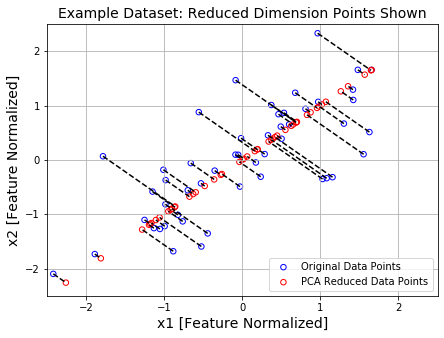

In [25]:
#Quick plot, now drawing projected points to the original points
plt.figure(figsize=(7,5))
plot = plt.scatter(norm_X[:,0], norm_X[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plot = plt.scatter(re_X[:,0], re_X[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(norm_X.shape[0]):
    plt.plot([norm_X[x,0],re_X[x,0]],[norm_X[x,1],re_X[x,1]],'k--')
    
leg = plt.legend(loc=4)

#Force square axes to make projections look better
dummy = plt.xlim((-2.5,2.5))
dummy = plt.ylim((-2.5,2.5))

## 图片压缩 

In [26]:
mat = loadmat('./data/ex7faces.mat')
X = mat['X']
X.shape

(5000, 1024)

In [36]:
import scipy.misc
from matplotlib import cm

In [37]:
def getDatumImg(row):
    """
    Function that is handed a single np array with shape 1x1032,
    crates an image object from it, and returns it
    """
    width, height = 32, 32
    square = row.reshape(width,height)
    return square.T
    
def displayData(myX, mynrows = 10, myncols = 10):
    """
    Function that picks the first 100 rows from X, creates an image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 32, 32
    nrows, ncols = mynrows, myncols

    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in range(nrows*ncols):
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(myX[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(10,10))
    #img = scipy.misc.toimage( big_picture )
    img = big_picture
    plt.imshow(img,cmap = cm.Greys_r)

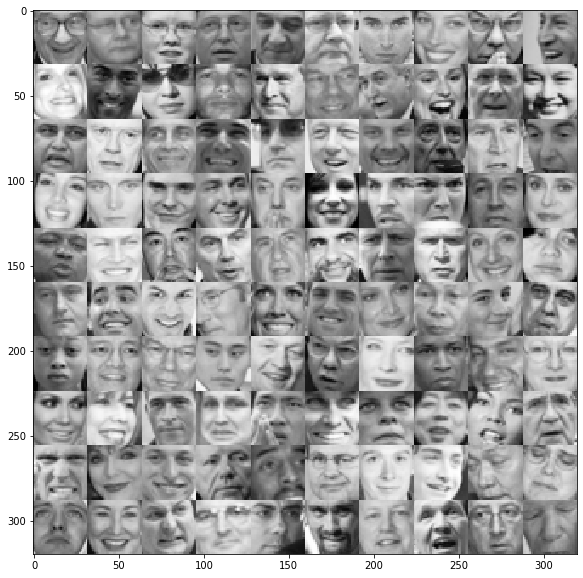

In [38]:
displayData(X)

In [40]:
# Feature normalize
means, stds, X_norm = features_normalize(X)
# Run SVD
U, S, V = get_USV(X_norm)

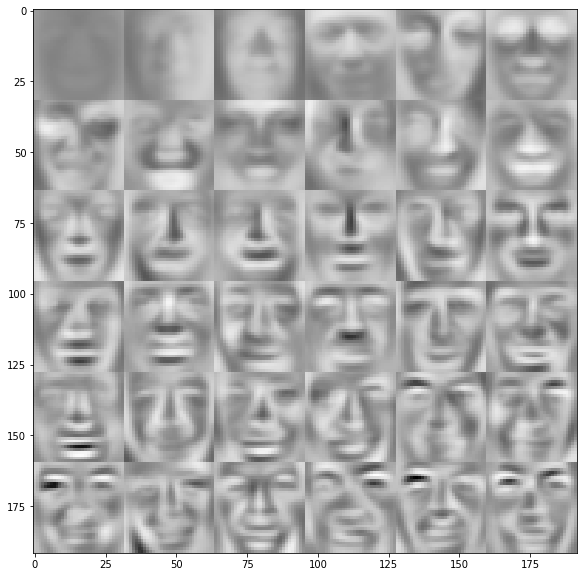

In [41]:
# Visualize the top 36 eigenvectors found
# "Eigenfaces" lol
displayData(U[:,:36].T,mynrows=6,myncols=6)

In [42]:
z = project_data(X_norm, U, 36)


In [43]:
z.shape

(5000, 36)

In [44]:
# Attempt to recover the original data
X_rec = recover_data(z, U, 36)

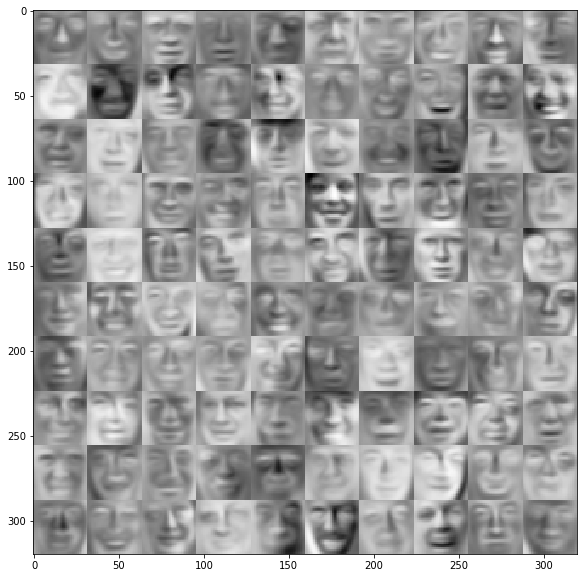

In [45]:
# Plot the dimension-reduced data
displayData(X_rec)

In [46]:
from skimage.io import imread

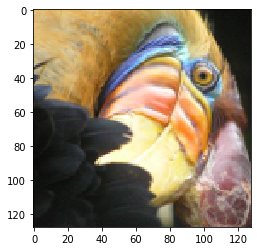

In [47]:
im = imread("./data/bird_small.png")
im = im / 255
plt.imshow(im)

In [48]:
im = im.reshape((-1, 3))

In [50]:
A = im
means, stds, A_norm = features_normalize(A)
# Run SVD
U, S, V = get_USV(A_norm)

In [51]:
z = project_data(A_norm, U, 2)

In [52]:
#从样本中提取k个样本出来
def random_init(data, k):
    import time
    r = np.random.RandomState(int(time.time()))
    return data[np.random.randint(0, len(data), k)]
def dist(X, centroids):
    d = X.reshape(-1, 1, X.shape[-1]) - centroids
    d = (d * d).sum(axis=2)
    return d
def K_means(X, k, centroids=None, epoches=10):
    if centroids is None:
        centroids = random_init(X, k)
    centroids_history = [centroids]
    cost = []
    m = len(X)
    c = None
    for i in range(epoches):
        # 先找到每一个样本的最近簇中心点
        d = dist(X, centroids)
        # c是簇中心值
        c = d.argmin(axis=1)
        # md是每个样本到簇中心的距离
        md = d.min(axis=1)
        # KMeans的损失函数值
        cost.append(md.sum() / m)
        
        # 更新簇中心位置
        new_centroids = np.empty_like(centroids)
        for i in range(k):        
            #选出第i类的所有样本
            kX = X[c == i]
            #更新簇中心所在位置
            new_centroids[i] = kX.mean(axis=0)
            
        centroids_history.append(new_centroids)
        centroids = new_centroids
    return c, centroids_history, cost
def best_KMeans(X, k, times=10, epoches=10):
    best_c = None
    best_hist = None
    best_cost = None
    min_cost = 99999999.
    for i in range(times):
        c, hist, cost = K_means(X, k, None, epoches)
        if cost[-1] < min_cost:
            min_cost = cost[-1]
            best_cost = cost
            best_hist = hist
            best_c = c
    return best_c, best_hist, best_cost

In [53]:
c, hist, cost = best_KMeans(A, 16, 10, 5)
c

array([11, 11, 11, ...,  9,  2,  2], dtype=int64)

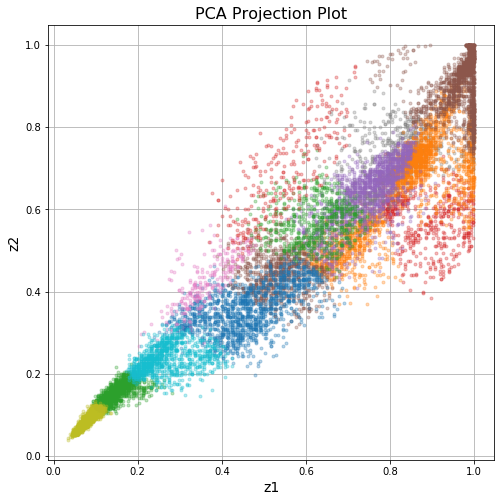

In [62]:
# Make the 2D plot
subX = []
for x in range(len(np.unique(c))):
    subX.append(np.array([A[i] for i in range(A.shape[0]) if c[i] == x]))
        
fig = plt.figure(figsize=(8,8))
for x in range(len(subX)):
    newX = subX[x]
    plt.plot(newX[:,0],newX[:,1],'.',alpha=0.3)
plt.xlabel('z1',fontsize=14)
plt.ylabel('z2',fontsize=14)
plt.title('PCA Projection Plot',fontsize=16)
plt.grid(True)